# Fonte
https://github.com/jeffrey125/Mall-Customer-Segmentation?tab=readme-ov-file

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [3]:
data = pd.read_csv('data/ausencias_medicas.csv')
data.head()

,distance_from_home,number_licenses,number_days,repeat,hospital,employment_temporary,online,fraud
0,57.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,10.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,5.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2.0,5.0,0.0,1.0,1.0,0.0,1.0,0.0
4,44.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0


In [4]:
data.describe()

,distance_from_home,number_licenses,number_days,repeat,hospital,employment_temporary,online,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.128842,4.623460,1.355041,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.391210,25.828458,2.791779,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.000000,11851.000000,267.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data2 = data.drop(['fraud'], axis=1)

Text(0, 0.5, 'number_licenses')

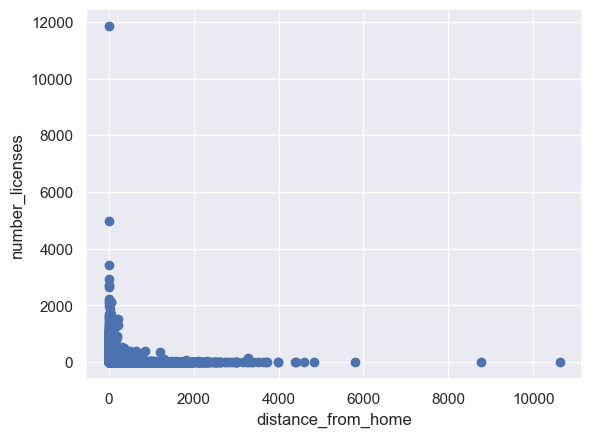

In [9]:
plt.scatter(data2['distance_from_home'],data2['number_licenses'])
plt.xlabel('distance_from_home')
plt.ylabel('number_licenses')

In [12]:
from sklearn import preprocessing

In [10]:
x = data2[['distance_from_home' ,'number_licenses']]

In [13]:
x_scaled = preprocessing.scale(x)

In [14]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)

In [15]:
wcss

[2000000.000000344,
 1524988.6988581256,
 1320796.4454549646,
 978976.1605821709,
 756571.7964828401,
 651604.0707663742,
 482052.34723303665,
 421250.63595568447,
 335979.2753831986]

Text(0, 0.5, 'Within-cluster Sum of Squares')

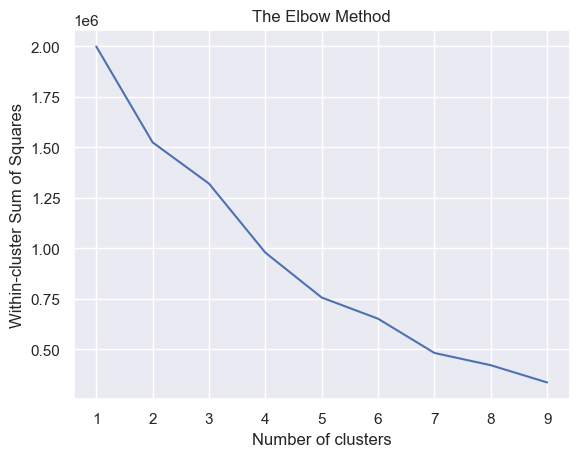

In [16]:
number_clusters = range(1,10)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [17]:
kmeans = KMeans(3)
kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [18]:
data_with_clusters = data2.copy()
data_with_clusters['Clusters'] = kmeans.fit_predict(x_scaled) 
data_with_clusters.head()

,distance_from_home,number_licenses,number_days,repeat,hospital,employment_temporary,online,Clusters
0,57.0,0.0,1.0,1.0,1.0,0.0,0.0,0
1,10.0,0.0,1.0,1.0,0.0,0.0,0.0,0
2,5.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,2.0,5.0,0.0,1.0,1.0,0.0,1.0,0
4,44.0,0.0,2.0,1.0,1.0,0.0,1.0,0


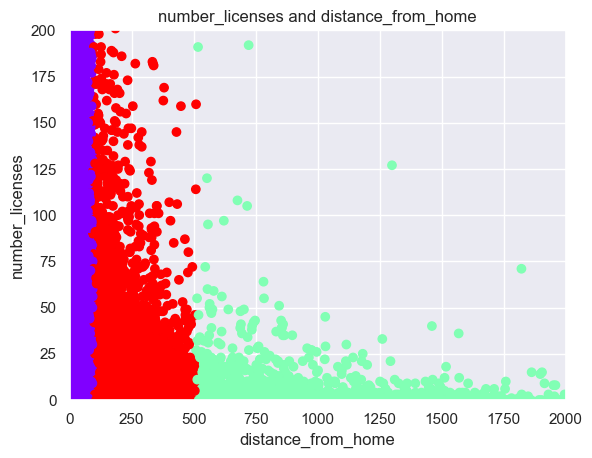

In [31]:
plt.scatter(data2['distance_from_home'],data2['number_licenses'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.title('number_licenses and distance_from_home')
plt.xlabel('distance_from_home')
plt.ylabel('number_licenses')
ax = plt.gca()
ax.set_xlim([0, 2000])
ax.set_ylim([0, 200])
plt.show()

In [24]:
x2 = data2[['number_licenses', 'number_days']]
x2_scaled = preprocessing.scale(x2)

In [25]:
kmeans2 = KMeans(3)
kmeans2.fit(x2_scaled)

KMeans(n_clusters=3)

In [26]:
data_with_clusters2 = data2.copy()
data_with_clusters2['Clusters'] = kmeans2.fit_predict(x2_scaled) 
data_with_clusters2

,distance_from_home,number_licenses,number_days,repeat,hospital,employment_temporary,online,Clusters
0,57.0,0.0,1.0,1.0,1.0,0.0,0.0,0
1,10.0,0.0,1.0,1.0,0.0,0.0,0.0,0
2,5.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,2.0,5.0,0.0,1.0,1.0,0.0,1.0,0
4,44.0,0.0,2.0,1.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...
999995,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0
999996,19.0,2.0,2.0,1.0,1.0,0.0,0.0,0
999997,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0
999998,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0


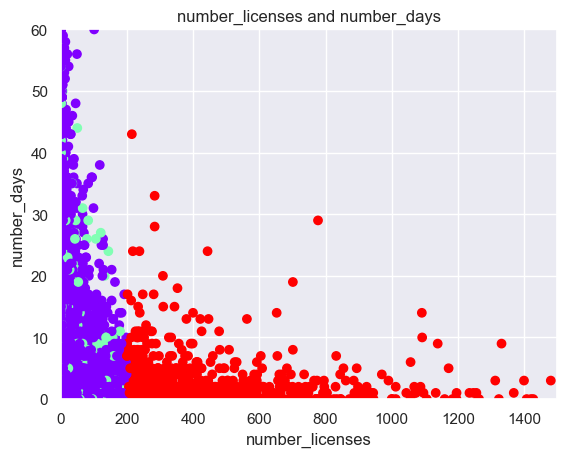

In [30]:
plt.scatter(data2['number_licenses'],data2['number_days'], c=data_with_clusters2['Clusters'], cmap='rainbow')
plt.title('number_licenses and number_days')
plt.xlabel('number_licenses')
plt.ylabel('number_days')
ax = plt.gca()
ax.set_xlim([0, 1500])
ax.set_ylim([0, 60])
plt.show()